### ESM2 SDI - Cours de THGR 2020-2021

---------
<center><h1 style="background-color:#c0cfc0;height:50px"> TP7 : Programmation en Python d'algorithmes présentés en cours </h1> </center>

----------


## Exercice 1 : Algorithme de FLOYD.

Pour déterminer les plus courts chemins entre deux sommets, l’algorithme de DIJSKRA pourrait être utilisé, mais son efficacité est faible dans ce type de problème. En revanche, l’algorithme de FLOYD est simple dans sa mise en œuvre et peut être utilisé y compris lorsque les valuations sont négatives.
Soit   l'ensemble des sommets du graphe   et soient $i$ et $j$ deux sommets de $G$. On considère un chemin $C$ entre $i$ et $j$ de poids minimal dont les sommets intermédiaires sont dans  .
L'algorithme de FLOYD est basé sur l'observation suivante $\{1,2,\cdots,k\}$ :
- soit $C$ n'emprunte pas le sommet $k$ ;
- soit $C$ emprunte exactement une fois le sommet $k$ (car les cycles sont de poids positifs ou nuls) et $C$ est donc la concaténation de deux chemins, entre $i$ et $k$ et $k$ et $j$ respectivement, dont les sommets intermédiaires sont dans  $\{1,2,\cdots,k-1\}$ .

Notons $L^{(k)}=\left( l^{(k)}_{ij}\right)$   la matrice  $n\times n$ dont le coefficient  $l^{(k)}_{ij}$ est la longueur minimale d’un chemin d’origine $i$ et d’extrémité $j$, n'empruntant que des sommets intermédiaires dans  $\{1,2,\cdots,k\}$, s'il en existe un, et $\infty$  sinon. (Pour les termes diagonaux on a $l_{ii}=0$). 
- $L^{(0)}=\left( l^{(0)}_{ij}\right)$  est la matrice définissant $G$ .
- L'observation ci-dessus se traduit par l'égalité :
$$l^{(k)}_{ij}=\min \left(l^{(k-1)}_{ij},l^{(k-1)}_{ik}+l^{(k-1)}_{kj}\right)$$ 
 
-	En sortie, on récupère :
$L=L^{(n)}=\left( l^{(n)}_{ij}\right)$: la matrice des longueurs des plus courts chemins entre tous les sommets.
$P=P^{(n)}=\left( p^{(n)}_{ij}\right)$ :	la matrice des prédécesseurs $ p^{(n)}_{ij}$ donne le numéro du sommet prédécesseur immédiat de $j$ sur le plus court chemin entre $i$ et $j$).



#### 1. Représenter le graphe  $\vec G = \left( {S,{\vec {\cal A}}} \right)$  défini par sa matrice d'adjacence :
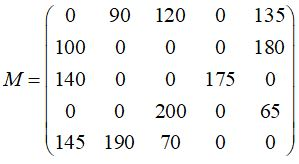

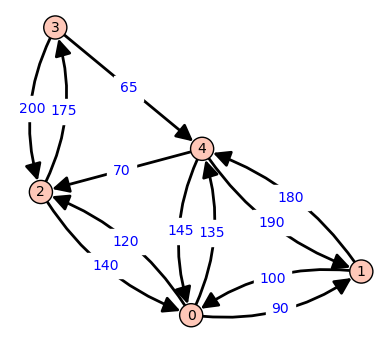

(None,
 [[0, 90, 120, 0, 135],
  [100, 0, 0, 0, 180],
  [140, 0, 0, 175, 0],
  [0, 0, 200, 0, 65],
  [145, 190, 70, 0, 0]])

In [17]:
# REPONSE :

M = [[0,  90, 120,0,  135],
            [100,0,  0,  0,  180],
            [140,0,  0,  175,0  ],
            [0,  0,  200,0,  65 ],
            [145,190,70, 0,  0  ]]
K=DiGraph(data=matrix(M),format='weighted_adjacency_matrix')
K.show(edge_labels=True), M

#### 2. Ecrire une fonction ``Floyd()``  qui emplémente l'algorithme de FLOYD à un graphe et l'appliquer au graphe  $\vec G $ ci-dessus.

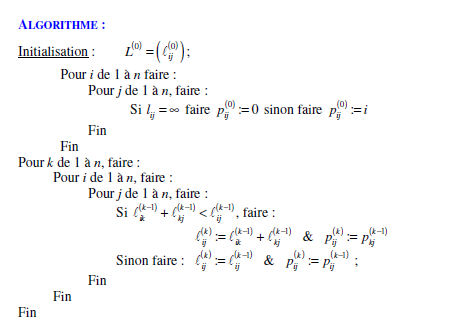

In [24]:
# REPONSE :
import copy
def floyd_Algorithm(M):
    n = len(M)
    graph = copy.deepcopy(M)
    for k in range(n):
        for i in range(n):
            for j in range(n):
                if M[i][k] + M[k][j] < M[i][j]:
                    graph[i][j] = M[i][k] + M[k][j]

    return graph

floyd_Algorithm(M)

[[0, 0, 90, 0, 65],
 [0, 0, 0, 0, 65],
 [100, 0, 0, 0, 0],
 [0, 0, 135, 0, 65],
 [0, 0, 70, 0, 0]]

### 3. Exécuter la cellule ci-dessous et comparer.

In [8]:
# REPONSE :
dist, pred = K.shortest_path_all_pairs(by_weight=True)
print (dist)
print (pred)

{0: {0: 0, 1: 90, 2: 120, 3: 295, 4: 135}, 1: {0: 100, 1: 0, 2: 220, 3: 395, 4: 180}, 2: {0: 140, 1: 230, 2: 0, 3: 175, 4: 240}, 3: {0: 210, 1: 255, 2: 135, 3: 0, 4: 65}, 4: {0: 145, 1: 190, 2: 70, 3: 245, 4: 0}}
{0: {0: None, 1: 0, 2: 0, 3: 2, 4: 0}, 1: {0: 1, 1: None, 2: 0, 3: 2, 4: 1}, 2: {0: 2, 1: 0, 2: None, 3: 2, 4: 3}, 3: {0: 4, 1: 4, 2: 4, 3: None, 4: 3}, 4: {0: 4, 1: 4, 2: 4, 3: 2, 4: None}}


## Exercice 2 : Algorithme de PRIM.

#### L'algorithme ``Prim`` permet de construire un arbre couvrant de poids minimal (ou maximal) d'un graphe valué.
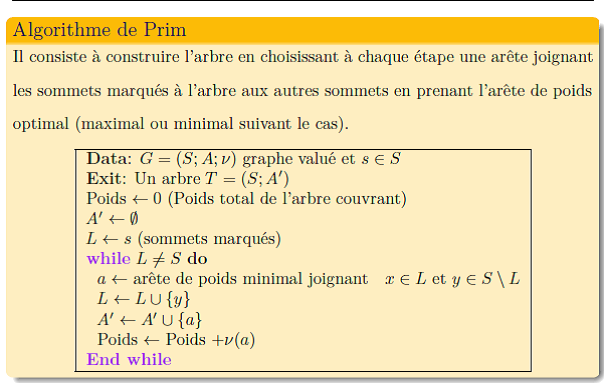

#### Ecrire une fonction `` Prim() ``  qui implémente l'algorithme de PRIM à un graphe et l'appliquer au graphe  $ G = \left( {S,{\cal A}} \right)$ défini par sa matrice d'adjacence :
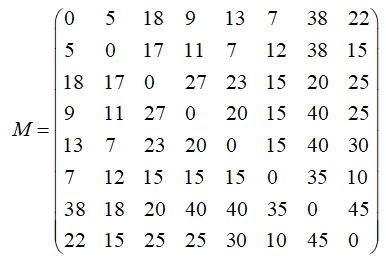

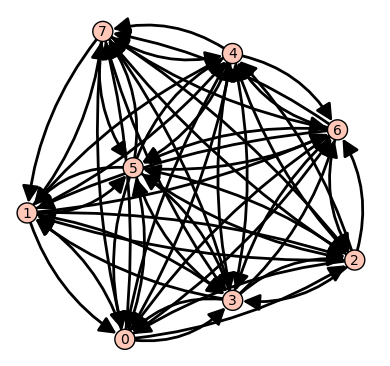

In [4]:
# REPONSE :
# Représentation du graphe
M = matrix([[0, 5, 18,9, 13,7, 38,22],
     [5, 0, 17,11,7, 12,38,15],
     [18,17,0, 27,23,15,20,25],
     [9, 11,27,0, 20,15,40,25],
     [13,7, 23,20,0, 15,40,30],
     [7, 12,15,15,15,0, 35,10],
     [38,18,20,40,40,35,0, 45],
     [22,15,25,25,30,10,45,0 ]])
G=DiGraph(data=M,format='weighted_adjacency_matrix')
G.show()

In [2]:
# REPONSE :
# Algorithme de PRIM

def prim(G):

    


### Fin du TP